<a href="https://colab.research.google.com/github/julibecaj/AIProject/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load built-in breast cancer dataset
data = load_breast_cancer()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Preview the data
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dataset Shape: (569, 31)

Data types:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave po

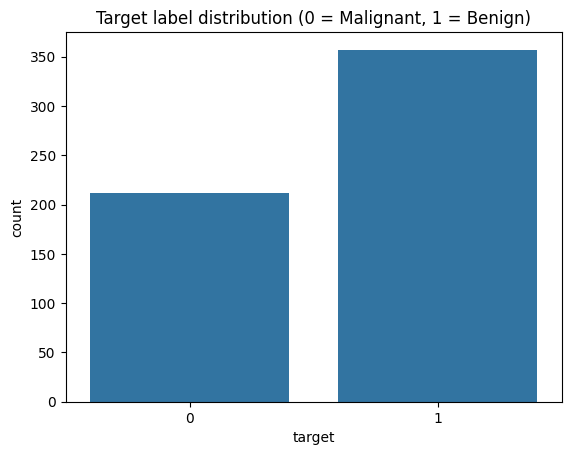

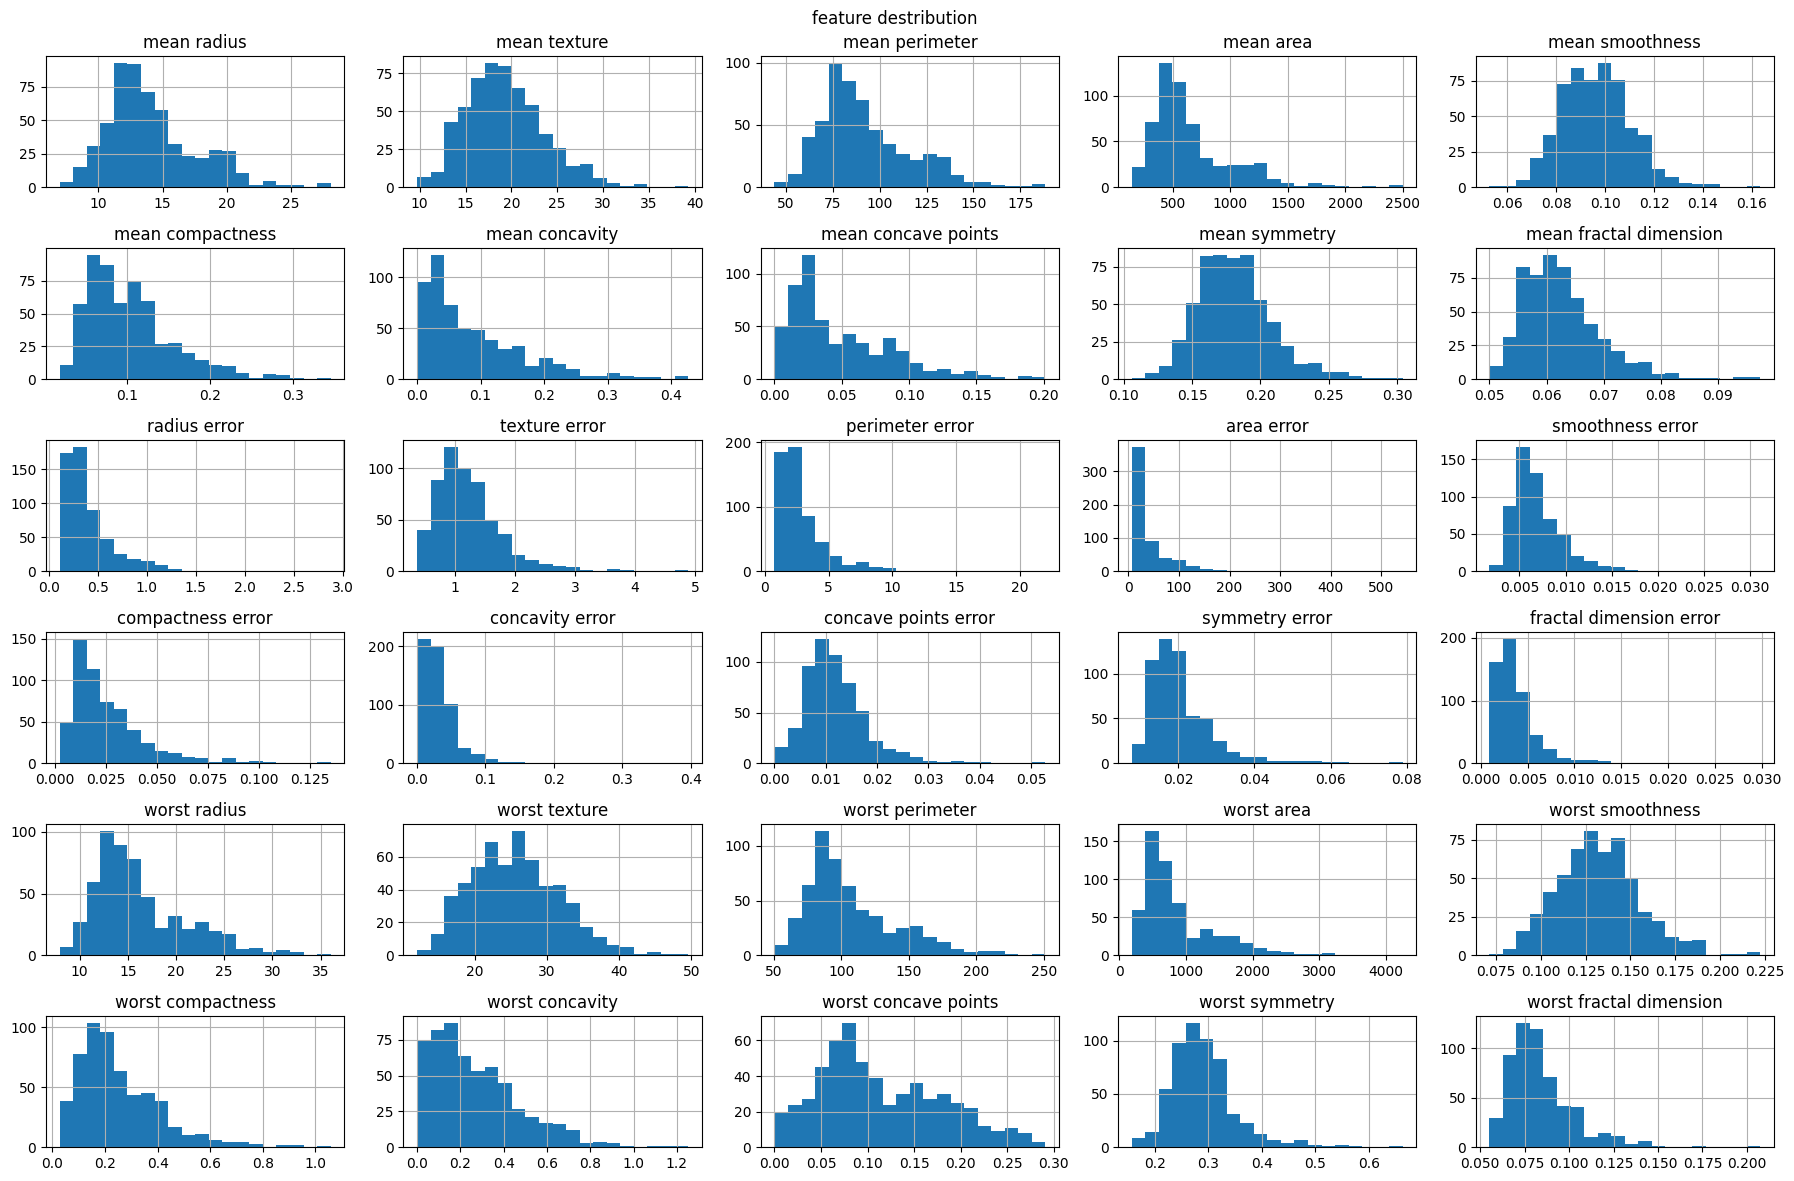

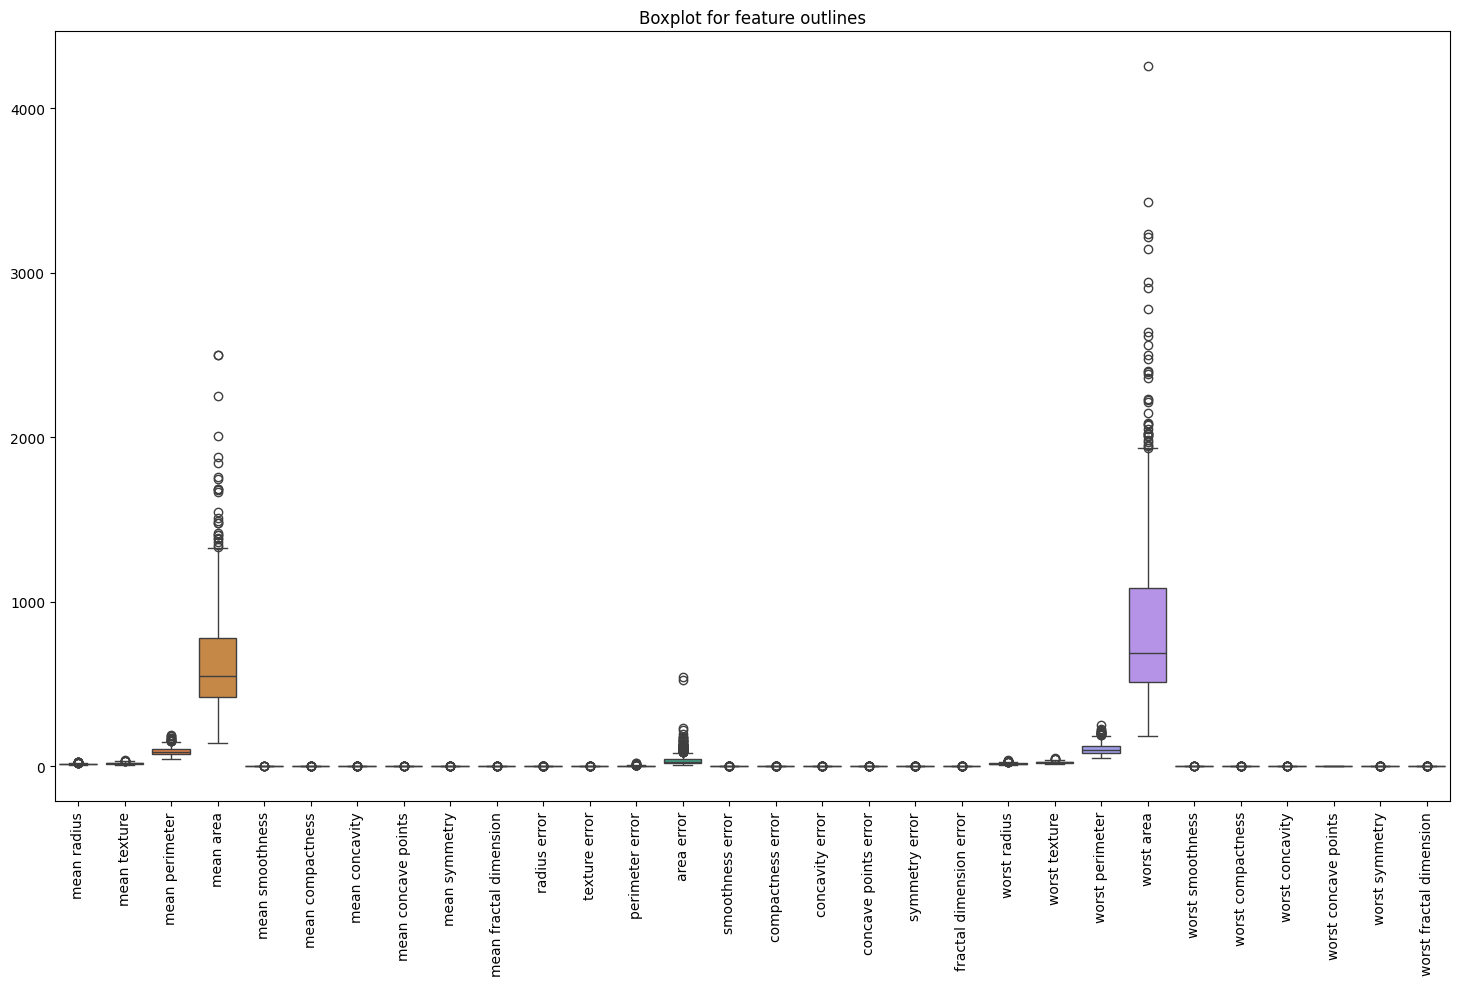

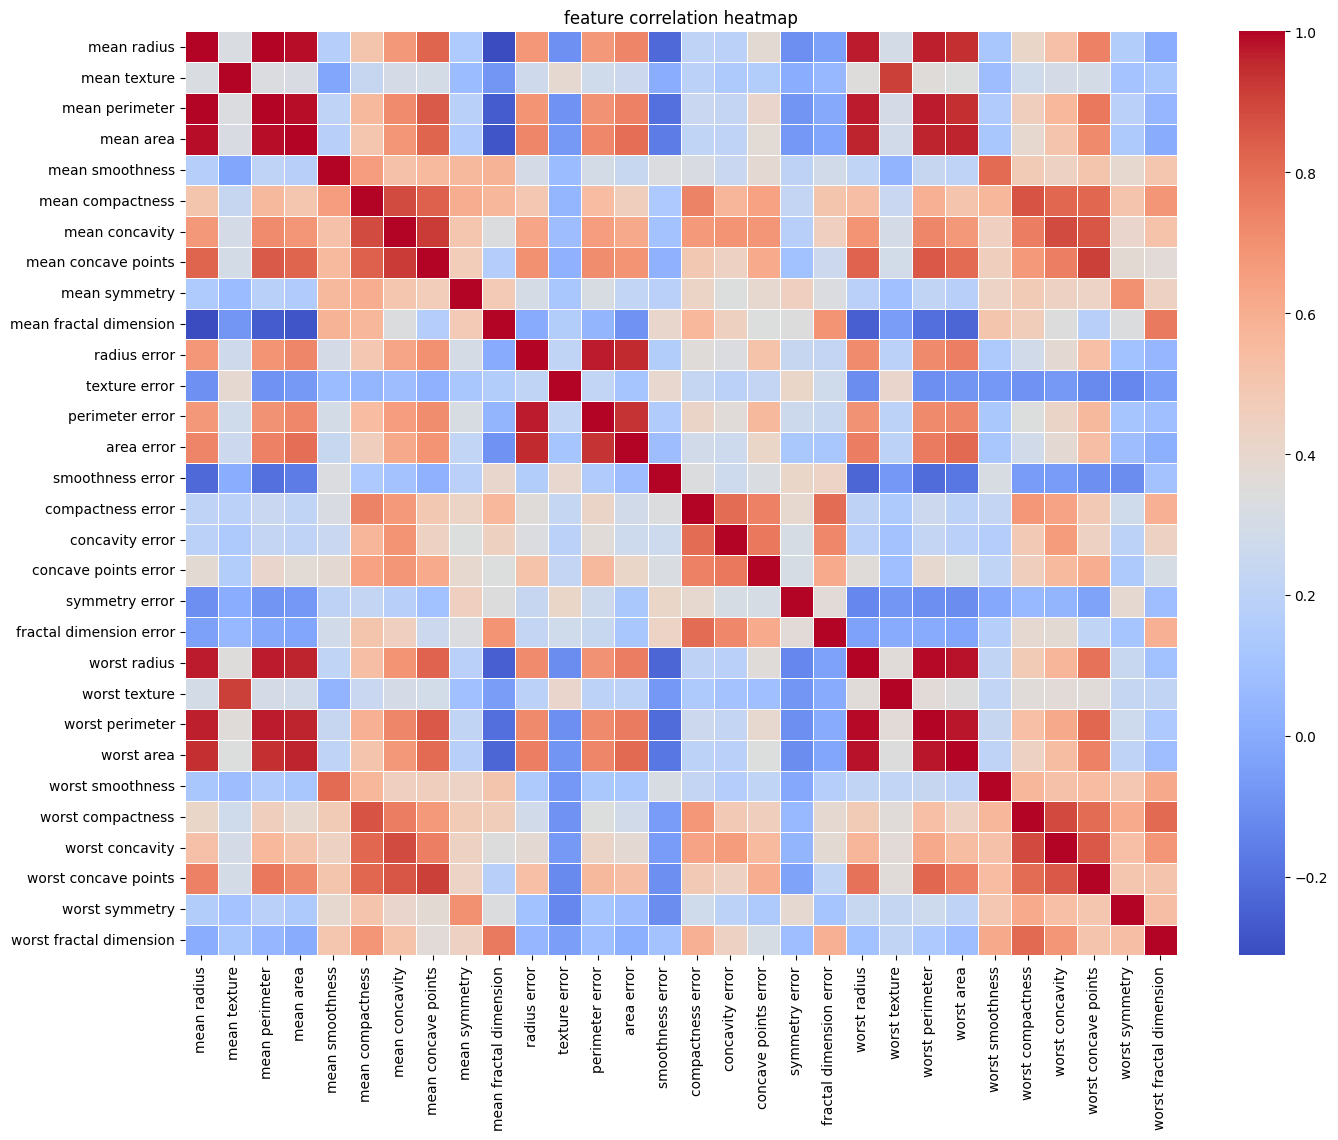

In [3]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Step 2: Load dataset
data = load_breast_cancer()

# Step 3: Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target as a new column
#----
#basic dataset info
print("Dataset Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head)
print("\nSumary statistics:", df.describe())

#target distribution
sns.countplot(x='target', data=df)
plt.title('Target label distribution (0 = Malignant, 1 = Benign)')
plt.show()

#histograms for features
df.drop('target', axis = 1).hist(bins=20, figsize=(18,12))
plt.suptitle("feature destribution")
plt.tight_layout()
plt.show()

#boxplots for outliers
plt.figure(figsize=(18,10))
sns.boxplot(data = df.drop('target', axis = 1))
plt.title("Boxplot for feature outlines")
plt.xticks(rotation = 90)
plt.show()

#correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.drop('target', axis=1).corr(), annot = False, cmap='coolwarm', linewidths=0.5)
plt.title("feature correlation heatmap")
plt.show()

<ipython-input-3-d6c2d198b83c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


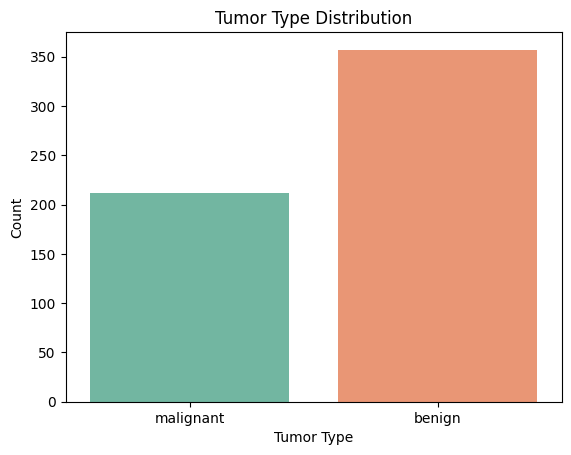

In [3]:
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})  # Rename labels

sns.countplot(data=df, x='target', palette='Set2')
plt.title('Tumor Type Distribution')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()


In [4]:
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


this shows that the data frame has no missing values!

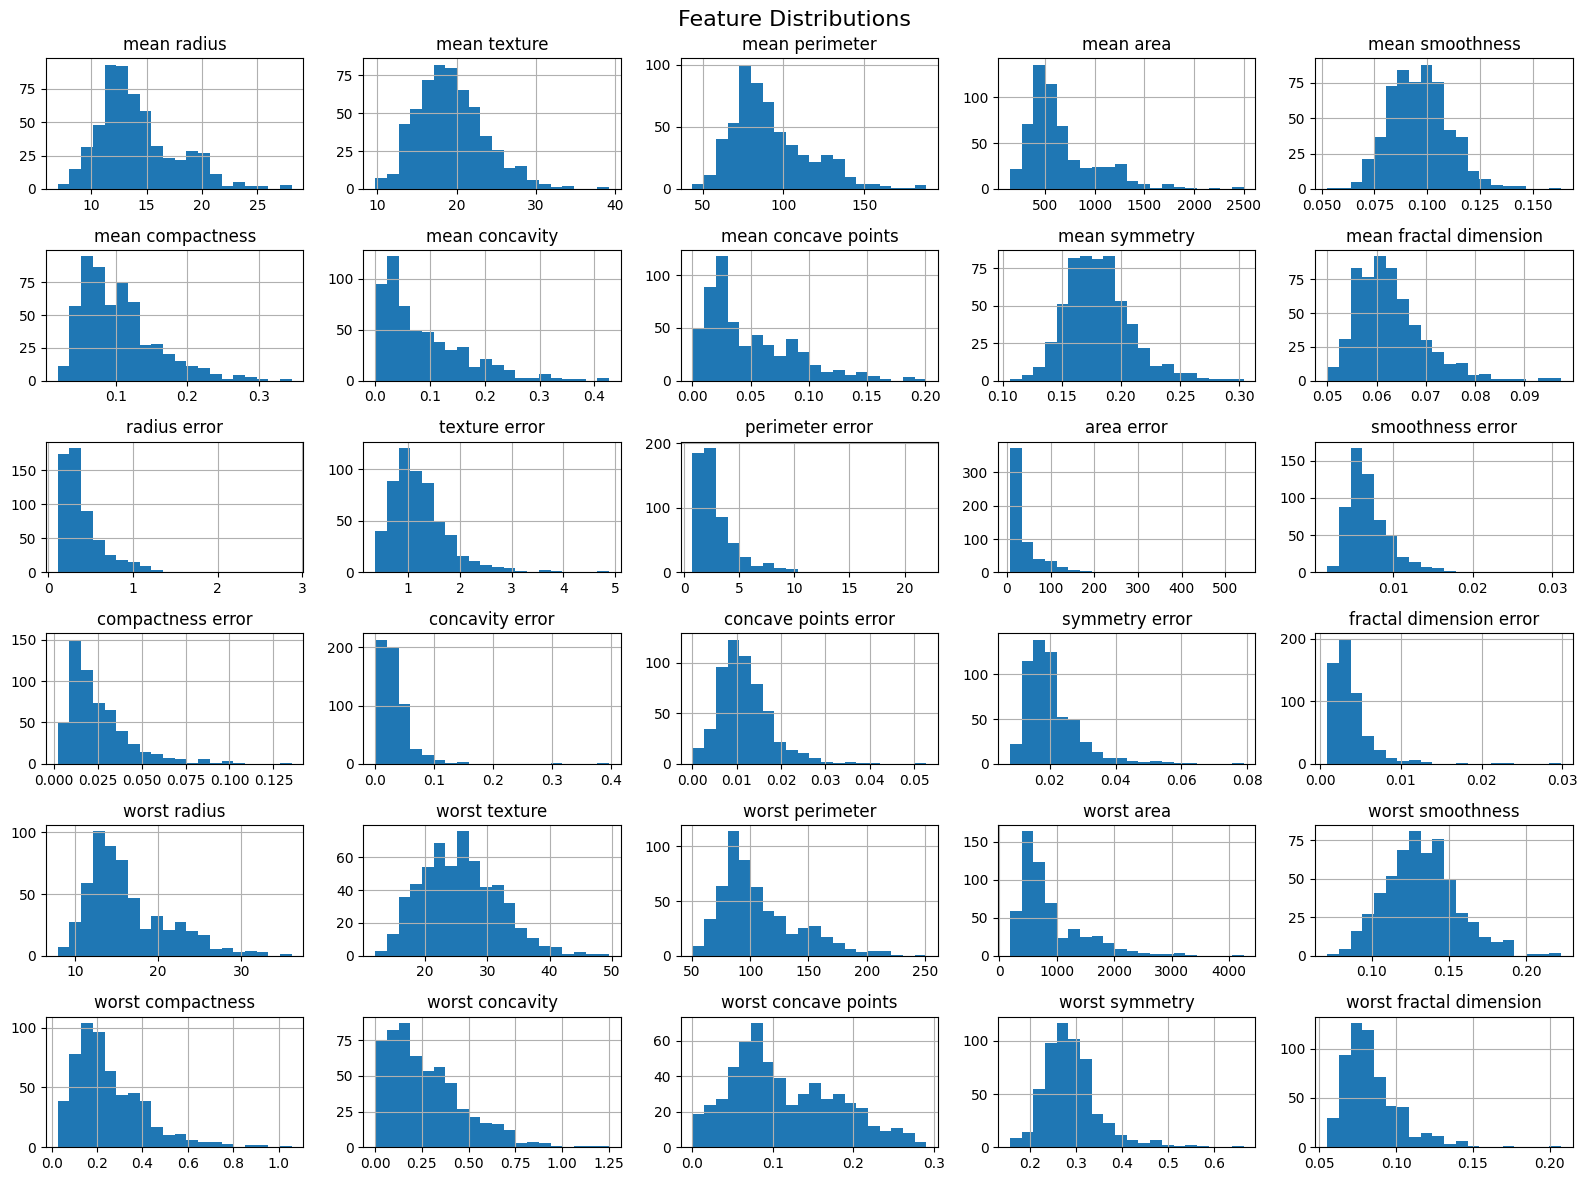

In [5]:
df.drop('target', axis=1).hist(figsize=(16, 12), bins=20)
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


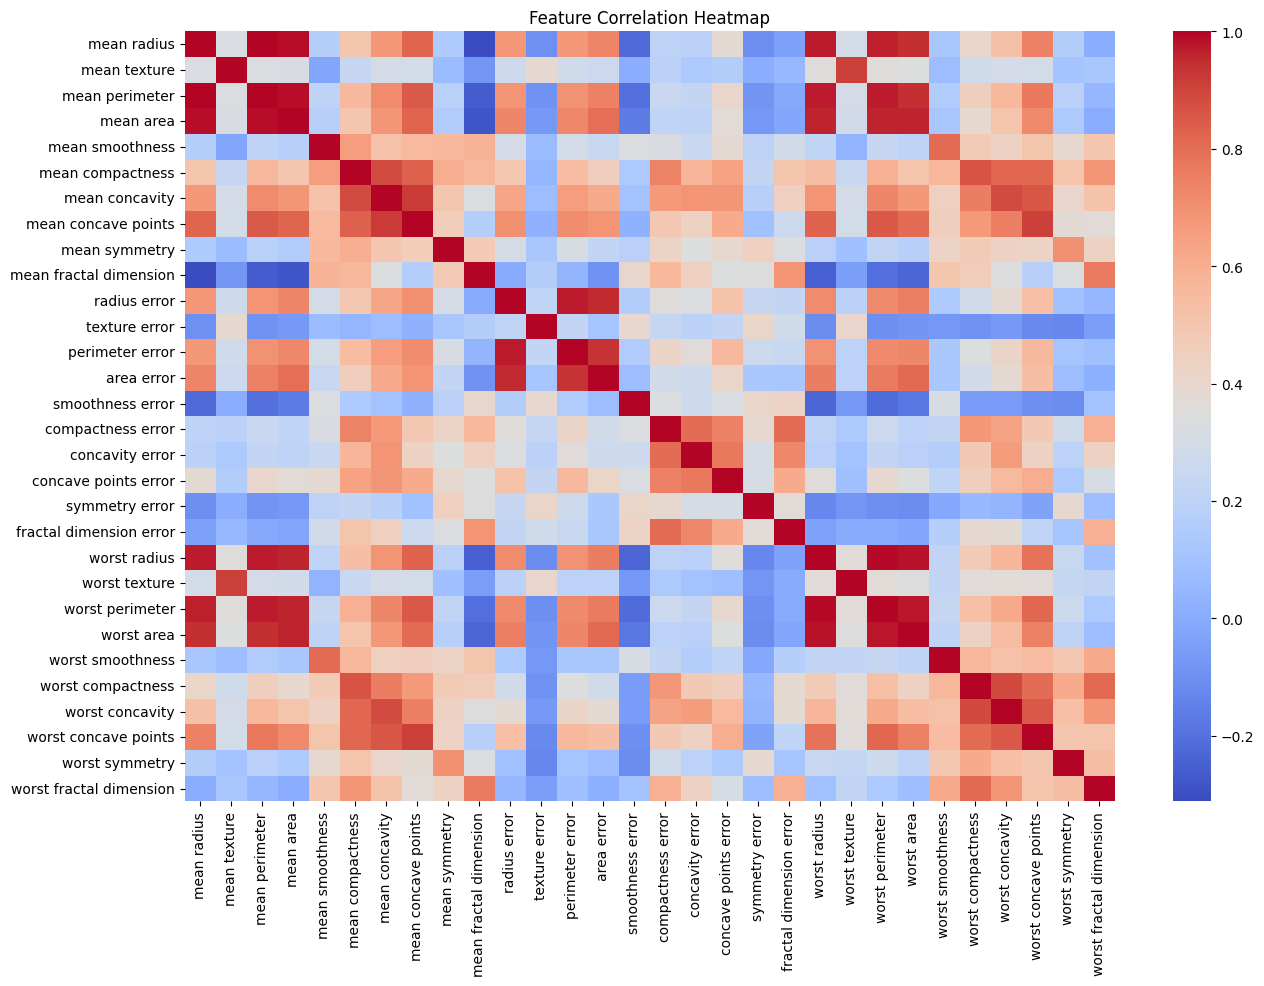

In [6]:
plt.figure(figsize=(15, 10))
corr = df.drop('target', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
# Features and labels
X = df.drop('target', axis=1)
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))
print("---")

#x_train

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: 455
y_test shape: 114
---


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

['benign' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'malignant' 'malignant' 'malignant' 'benign' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'benign' 'malignant' 'benign'
 'benign' 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malignant' 'benign' 'benign'
 'malignant' 'malignant' 'benign' 'benign' 'benign' 'malignant'
 'malignant' 'benign' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'benign' 'benign' 'benign' 'malignant' 'benign'
 'benign' 'benign' 'benign' 'malignant' 'malign

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

      benign       0.96      0.96      0.96        71
   malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



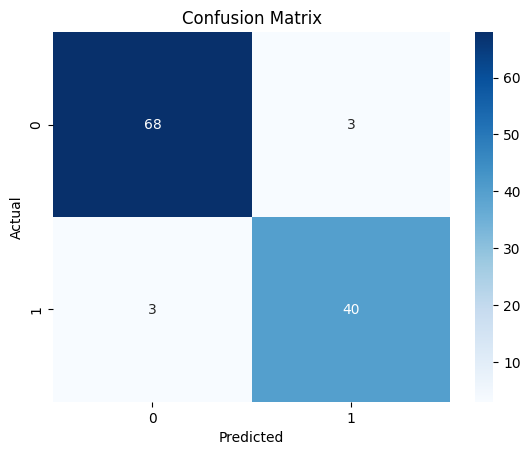

In [10]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


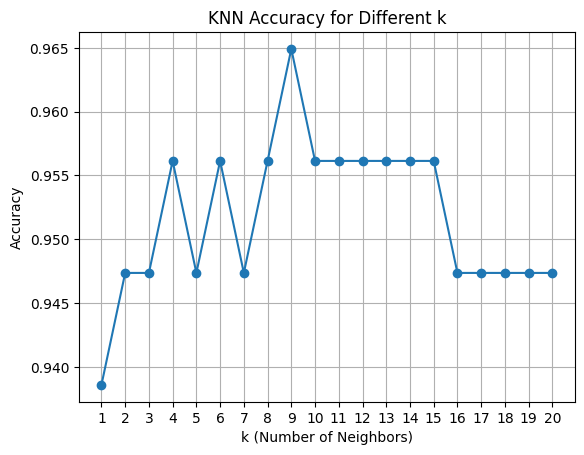

Best k: 9
Optimized Accuracy: 0.9649122807017544


In [11]:
accuracy_scores = []
neighbors_range = range(1, 21)

for k in neighbors_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

# Plot accuracy vs. number of neighbors
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title('KNN Accuracy for Different k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()
plt.show()
#---
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best k:", best_k)

knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)
y_pred_opt = knn_optimized.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))
